# Topic Modelling

## Import library

Install pyLDAvis jika module tidak ditemukan

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 9.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=414ecbdedb2d82a63cc1026f7d97b6bb6ed528c040ca2327c7ab64e72794cb78
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=41beaccdbc329076ec77f9891ebc565e197cf7d398fd8de4d08e69caa447348c
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn


In [ ]:
pip install corextopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import nltk
from nltk import corpus
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.corpora.dictionary import Dictionary
import gensim
import gensim.corpora as corpora
import re
import numpy as np
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning) 

from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity, paired_cosine_distances

import seaborn as sns
from corextopic import corextopic as ct

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


##ICSME 5 Tahun

In [ ]:
papers = pd.read_csv("/content/dataPaper.csv")
papers.head

<bound method NDFrame.head of     Nomor                                              Judul  Tahun  \
0       1     Artifacts for Dynamic Analysis of Android Apps   2017   
1       2  TraceLab Components for Generating Extractive ...   2017   
2       3  Flattening Code for Metrics Measurement and An...   2017   
3       4                                  Keynote abstracts   2017   
4       5  CCLearner: A Deep Learning-Based Clone Detecti...   2017   
..    ...                                                ...    ...   
95     96     Restats: A Test Coverage Tool for RESTful APIs   2021   
96     97             Assessing Generalizability of CodeBERT   2021   
97     98            FluentCrypto: Cryptography in Easy Mode   2021   
98     99  On the Evaluation of Commit Message Generation...   2021   
99    100    Software Architecture Challenges for ML Systems   2021   

         Negara                                            Abstrak  
0           USA  We describe a set of artifacts 

In [ ]:
#Removing symbols from Abstrak
papers['Abstract_Cleaned'] = papers.apply(lambda row: (re.sub("[^A-Za-z0-9' ]", ' ', row['Abstrak'])),axis=1)
# Tokenization

papers['Abstract_Cleaned'] = papers.apply(lambda row: (word_tokenize(row['Abstract_Cleaned'])), axis = 1)
# Removing Stopwords

stop_words = set(stopwords.words('english'))
papers['Abstract_Cleaned'] = papers.apply(lambda row: ([w for w in row['Abstract_Cleaned'] if w not in stop_words]),axis=1)
# Lemmatization

lmtzr = WordNetLemmatizer()
papers['Abstract_Cleaned'] = papers.apply(lambda row: ([lmtzr.lemmatize(w) for w in row['Abstract_Cleaned']]), axis=1)

papers.head

<bound method NDFrame.head of     Nomor                                              Judul  Tahun  \
0       1     Artifacts for Dynamic Analysis of Android Apps   2017   
1       2  TraceLab Components for Generating Extractive ...   2017   
2       3  Flattening Code for Metrics Measurement and An...   2017   
3       4                                  Keynote abstracts   2017   
4       5  CCLearner: A Deep Learning-Based Clone Detecti...   2017   
..    ...                                                ...    ...   
95     96     Restats: A Test Coverage Tool for RESTful APIs   2021   
96     97             Assessing Generalizability of CodeBERT   2021   
97     98            FluentCrypto: Cryptography in Easy Mode   2021   
98     99  On the Evaluation of Commit Message Generation...   2021   
99    100    Software Architecture Challenges for ML Systems   2021   

         Negara                                            Abstrak  \
0           USA  We describe a set of artifacts

In [ ]:
Abstrak = papers['Abstrak'].values

count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(Abstrak)
tfidf_vectorizer = TfidfTransformer().fit(counts)
tfidf_Abstrak = tfidf_vectorizer.transform(counts)
tfidf_Abstrak.shape

(100, 2827)

In [ ]:
#Testing affinity propogation on Abstrak tfidf(experimental)

X = tfidf_Abstrak
clustering = AffinityPropagation().fit(X)

abstract_affinity_clusters = list(clustering.labels_)
print(abstract_affinity_clusters)

print("Number of clusters found = ", len(set(abstract_affinity_clusters)))

[8, 7, 15, 0, 1, 2, 2, 20, 3, 7, 12, 4, 13, 20, 15, 16, 7, 12, 10, 7, 10, 5, 6, 7, 19, 7, 6, 7, 7, 10, 16, 8, 9, 12, 7, 7, 7, 16, 3, 10, 11, 12, 12, 5, 8, 2, 2, 8, 8, 12, 19, 9, 14, 7, 3, 3, 1, 1, 7, 13, 14, 15, 7, 13, 2, 1, 21, 19, 16, 16, 7, 4, 2, 7, 3, 7, 7, 5, 7, 17, 5, 18, 19, 19, 10, 7, 10, 19, 7, 19, 7, 7, 20, 4, 21, 5, 17, 21, 17, 14]
Number of clusters found =  22


In [ ]:
dictionary = corpora.Dictionary(papers['Abstract_Cleaned'])
texts = papers['Abstract_Cleaned']
corpus = [dictionary.doc2bow(text) for text in papers['Abstract_Cleaned']]

# Building LDA Model

lda_model_all = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=22, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Visualizing topics using pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_all, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
15    -0.034705  0.076206       1        1  9.827535
16    -0.141382 -0.059567       2        1  7.823017
1     -0.051229  0.043746       3        1  7.662082
0     -0.053135 -0.094218       4        1  6.964388
12    -0.070718  0.087066       5        1  6.134225
2     -0.066900  0.053275       6        1  5.881374
8     -0.114764 -0.149805       7        1  5.593555
7      0.020782  0.090695       8        1  5.430985
21    -0.024898  0.041874       9        1  5.427469
5     -0.077960  0.001215      10        1  5.353629
19    -0.004249  0.059681      11        1  5.287108
13     0.004748  0.009747      12        1  4.634929
20     0.037418  0.042725      13        1  3.542273
11    -0.024532  0.040854      14        1  3.449962
6      0.031315 -0.005914      15        1  3.359963
3      0.082429  0.027362      16        1  2.853180
9      0.077363  0.013432      17        1  2.734790
10     0.061142 -0.122034      18        1  2.360764
18     0.088522  0.036276      19        1  2.169207
17     0.107525 -0.067091      20        1  1.608857
4      0.066232 -0.102342      21        1  1.576766
14     0.086996 -0.023183      22        1  0.323942, topic_info=          Term        Freq       Total Category  logprob  loglift
158        bug   78.000000   78.000000  Default  30.0000  30.0000
346    project   63.000000   63.000000  Default  29.0000  29.0000
9         code  162.000000  162.000000  Default  28.0000  28.0000
301       test   61.000000   61.000000  Default  27.0000  27.0000
505     system   55.000000   55.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
213   software    0.466777   89.865405  Topic22  -4.3643   0.4721
101      paper    0.239289   48.218546  Topic22  -5.0325   0.4265
505     system    0.238759   55.582200  Topic22  -5.0347   0.2822
68          In    0.240401   58.217015  Topic22  -5.0279   0.2427
173  developer    0.238353   98.290140  Topic22  -5.0364  -0.2896

[1339 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
306       3  0.060391        's
306       4  0.181174        's
306       7  0.060391        's
306      10  0.181174        's
306      12  0.060391        's
...     ...       ...       ...
452      19  0.036225      work
452      21  0.036225      work
2198      5  0.641014  workflow
2198     19  0.320507  workflow
1675     11  0.831509     yield

[2858 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 17, 2, 1, 13, 3, 9, 8, 22, 6, 20, 14, 21, 12, 7, 4, 10, 11, 19, 18, 5, 15])

In [ ]:
nmf_model = NMF(n_components=22, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_Abstrak)
nmf_W = nmf_model.transform(tfidf_Abstrak)
nmf_H = nmf_model.components_
#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 15
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(nmf_H, nmf_W, tf_feature_names, title_list, no_top_words, no_top_documents)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,



 Topic 0:
Top Words:  the of and to in code we for that on is software developers this by
Context-Aware Software Documentation
Beyond Metadata: Code-Centric and Usage-Based Analysis of Known Vulnerabilities in Open-Source Software
Multimodal Representation for Neural Code Search
Confusion Detection in Code Reviews

 Topic 1:
Top Words:  deprecation api producers deprecate javadoc behind reasons rationale we knowing mentioned 374 see aids deciding
Why are Features Deprecated? An Investigation Into the Motivation Behind Deprecation
Why are Features Deprecated? An Investigation Into the Motivation Behind Deprecation
Statistical Translation of English Texts to API Code Templates
Dialogue Management for Interactive API Search

 Topic 2:
Top Words:  test cases web testing coverage asr elements smart smells to rest metrics deep execution only
NLP-assisted Web Element Identification Toward Script-free Testing
Restats: A Test Coverage Tool for RESTful APIs
On the Relation of Test Smells to Sof

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lda_model = LatentDirichletAllocation(n_components=22, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf_Abstrak)
lda_W = lda_model.transform(tfidf_Abstrak)
lda_H = lda_model.components_

#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 20
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(lda_H, lda_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  the of and needs to test in mutation whether metrics that suchas o4h2gn2qls on officially frequent public asource anti platform
eknows: Platform for Multi-Language Reverse Engineering and Documentation Generation
Keynote abstracts
Message from the General Co-Chairs and the Program Co-Chairs
Artifacts for Dynamic Analysis of Android Apps

 Topic 1:
Top Words:  group highlighting laborious module estimators directions single compiler balancing pinpoint metadata structures correlate specifying surface upon basic interpreting prioritization changed
eknows: Platform for Multi-Language Reverse Engineering and Documentation Generation
Keynote abstracts
Message from the General Co-Chairs and the Program Co-Chairs
Artifacts for Dynamic Analysis of Android Apps

 Topic 2:
Top Words:  the levels deciding batteries risk request to bandit averaged feedforward reports facilities portion serialization distances boosting been code workflow form
eknows: Platform for Multi-Languag

In [ ]:
tfidf_Abstrak_sim = []

for i in range(0,tfidf_Abstrak.shape[0]):
    sim_array = cosine_similarity(tfidf_Abstrak,tfidf_Abstrak[i])
    sim_array = sim_array.flatten()
    tfidf_Abstrak_sim.append(sim_array)
    
tfidf_Abstrak_sim[50]

array([0.05385924, 0.1025864 , 0.06565059, 0.04347165, 0.12125873,
       0.12021781, 0.14035645, 0.12520599, 0.08206435, 0.12171808,
       0.22799069, 0.11593848, 0.14572856, 0.10566245, 0.12275157,
       0.11954894, 0.11575859, 0.13398705, 0.16116427, 0.13876841,
       0.08846979, 0.17215645, 0.12309051, 0.15540839, 0.16529243,
       0.16021301, 0.12309051, 0.14126818, 0.10922908, 0.11495896,
       0.14555962, 0.12896834, 0.11767874, 0.19109845, 0.14489535,
       0.13602723, 0.12947869, 0.07978049, 0.1577242 , 0.10910603,
       0.05894233, 0.26299489, 0.19656703, 0.10527459, 0.08818308,
       0.11641865, 0.110936  , 0.13715297, 0.11161939, 0.19639809,
       1.        , 0.10082212, 0.11579605, 0.09363556, 0.13918292,
       0.14078297, 0.10073993, 0.34962895, 0.15640953, 0.12650025,
       0.09552077, 0.11238023, 0.05449218, 0.11644787, 0.10211793,
       0.07684264, 0.12351291, 0.13499143, 0.13036573, 0.14395494,
       0.11782792, 0.1042798 , 0.12058046, 0.12412622, 0.08275

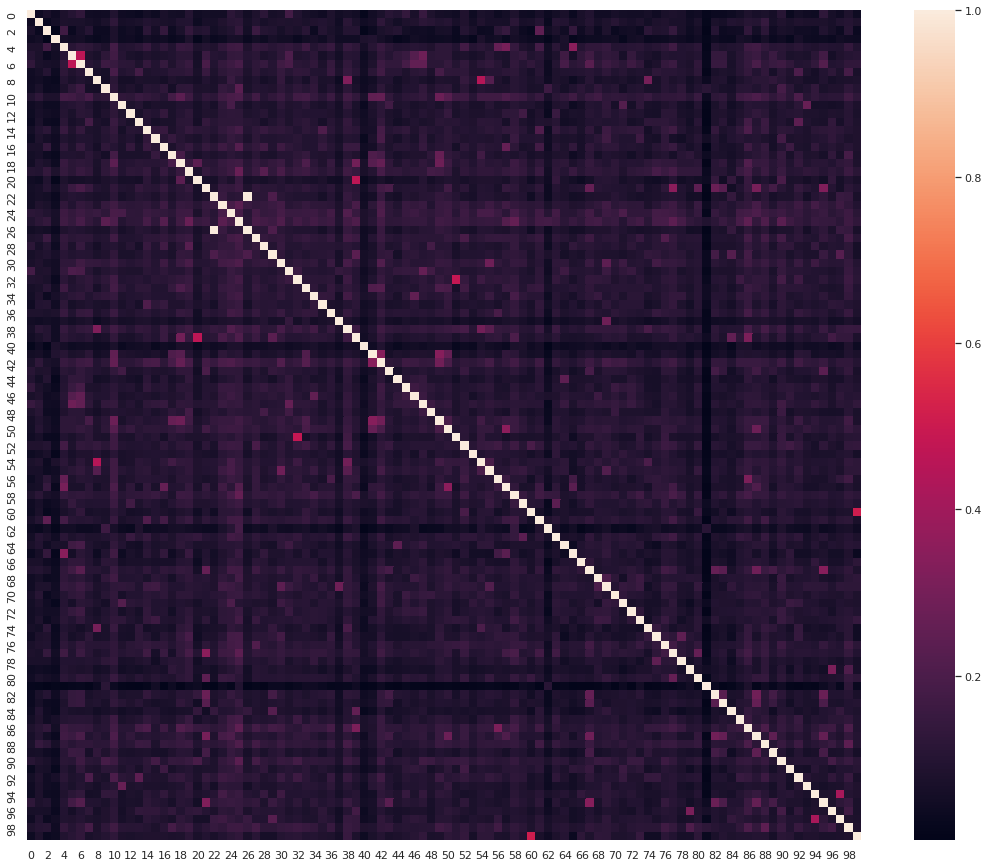

In [ ]:
tfidf_Abstrak_sim_matrix =  np.array(tfidf_Abstrak_sim)
tfidf_Abstrak_sim_matrix.shape

sns.set(rc={'figure.figsize':(18.7,15.27)})
sns.heatmap(tfidf_Abstrak_sim_matrix)

In [ ]:
anchors = []
model = ct.Corex(n_hidden=22, seed=69)
model = model.fit(
    tfidf_Abstrak,
    words=tf_feature_names
)
for i, topic_ngrams in enumerate(model.get_topics(n_words=20)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: deprecation, conference, logging, smart, deprecate, producers, javadoc, verbosity, discrepancies, proceedings, thus, edits, reasons, iot, behind, inputs, contracts, contract, rationale, log
Topic #2: cryptography, crypto, pre, trained, codebert, sa4se, transformer, js, hard, se, generalizability, secure, fluentcrypto, nlp, sentiment, much, pl, bert, node, realize
Topic #3: ci, pipeline, cd, failures, ing, pipelines, oss, travis, restructuring, 34, delivery, continuous, build, builds, processes, integration, taxonomy
Topic #4: gnn, representative, graph, vulnerability, instantiations, encodings, rates, framework, progress, representations, functions, prediction
Topic #5: analyses, countries, reviews, uis, mechanisms, user, ui, app, factors, us, availability, invest, crawlers, sophisticated
Topic #6: 
Topic #7: 
Topic #8: 
Topic #9: 
Topic #10: 
Topic #11: 
Topic #12: 
Topic #13: 
Topic #14: 
Topic #15: 
Topic #16: 
Topic #17: 
Topic #18: 
Topic #19: 
Topic #20: 
Topic #21: 
To

## ICSME 2021


In [ ]:
papers_2021 = papers[papers['Tahun']==2021].copy()

In [ ]:
#Removing symbols from Abstrak

papers_2021['Abstract_Cleaned'] = papers_2021.apply(lambda row: (re.sub("[^A-Za-z0-9' ]", ' ', row['Abstrak'])),axis=1)
# Tokenization

papers_2021['Abstract_Cleaned'] = papers_2021.apply(lambda row: (word_tokenize(row['Abstract_Cleaned'])), axis = 1)
# Removing Stopwords

stop_words = set(stopwords.words('english'))
papers_2021['Abstract_Cleaned'] = papers_2021.apply(lambda row: ([w for w in row['Abstract_Cleaned'] if w not in stop_words]),axis=1)
# Lemmatization

lmtzr = WordNetLemmatizer()
papers_2021['Abstract_Cleaned'] = papers_2021.apply(lambda row: ([lmtzr.lemmatize(w) for w in row['Abstract_Cleaned']]), axis=1)

papers_2021.head

<bound method NDFrame.head of     Nomor                                              Judul  Tahun  \
80     81  Design Smells in Deep Learning Programs: An Em...   2021   
81     82  eknows: Platform for Multi-Language Reverse En...   2021   
82     83  NLP-assisted Web Element Identification Toward...   2021   
83     84  Can Differential Testing Improve Automatic Spe...   2021   
84     85     Dialogue Management for Interactive API Search   2021   
85     86  Sorrel: an IDE Plugin for Managing Licenses an...   2021   
86     87   Multimodal Representation for Neural Code Search   2021   
87     88  The Unit Test Quality of Deep Learning Librari...   2021   
88     89  Ensemble Models for Neural Source Code Summari...   2021   
89     90  SmartGift: Learning to Generate Practical Inpu...   2021   
90     91  An NLP-based Tool for Software Artifacts Analysis   2021   
91     92  IDEAL: An Open-Source Identifier Name Appraisa...   2021   
92     93  Using Bandit Algorithms for Project 

In [ ]:
Abstrak = papers_2021['Abstrak'].values

count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(Abstrak)
tfidf_vectorizer = TfidfTransformer().fit(counts)
tfidf_Abstrak = tfidf_vectorizer.transform(counts)
tfidf_Abstrak.shape

(20, 1106)

In [ ]:
#Testing affinity propogation on Abstrak tfidf(experimental)
X = tfidf_Abstrak
clustering = AffinityPropagation().fit(X)

abstract_affinity_clusters = list(clustering.labels_)
print(abstract_affinity_clusters)

print("Number of clusters found = ", len(set(abstract_affinity_clusters)))

[2, 0, 1, 1, 4, 3, 2, 1, 2, 1, 3, 2, 2, 3, 4, 1, 3, 4, 2, 3]
Number of clusters found =  5


In [ ]:
dictionary = corpora.Dictionary(papers_2021['Abstract_Cleaned'])
texts = papers_2021['Abstract_Cleaned']
corpus = [dictionary.doc2bow(text) for text in papers_2021['Abstract_Cleaned']]

# Building LDA Model

lda_model_2021 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Visualizing topics using pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_2021, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.144924  0.032682       1        1  28.644820
1     -0.110364  0.066930       2        1  26.519212
3     -0.021412 -0.144435       3        1  21.387443
4     -0.010813  0.039842       4        1  20.008964
2     -0.002335  0.004980       5        1   3.439561, topic_info=             Term       Freq      Total Category  logprob  loglift
301          code  17.000000  17.000000  Default  30.0000  30.0000
191          test  34.000000  34.000000  Default  29.0000  29.0000
6              DL   8.000000   8.000000  Default  28.0000  28.0000
211           ASR   7.000000   7.000000  Default  27.0000  27.0000
73          model  18.000000  18.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
179        result   0.344559   9.126589   Topic5  -5.4995   0.0931
410       conduct   0.344504   4.560491   Topic5  -5.4997   0.7867
218           Our   0.344483   6.194382   Topic5  -5.4997   0.4805
243    experiment   0.344448   3.109700   Topic5  -5.4998   1.1695
151  experimental   0.344234   2.403277   Topic5  -5.5005   1.4266

[299 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
201       3  0.964487       25
288       1  0.234656      API
288       3  0.351984      API
288       4  0.469312      API
819       1  0.544146     APIs
...     ...       ...      ...
365       1  0.547008  whether
365       4  0.273504  whether
197       1  0.913050  without
198       1  0.913046  written
401       2  0.918898      yet

[344 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 5, 3])

In [ ]:
nmf_model = NMF(n_components=5, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_Abstrak)
nmf_W = nmf_model.transform(tfidf_Abstrak)
nmf_H = nmf_model.components_
#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 15
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(nmf_H, nmf_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  the and of code to in for models is we project that software this dl
How do Developers Test Android Applications?
Learning to Predict Severity of Software Vulnerability Using Only Vulnerability Description
Using Observed Behavior to Reformulate Queries during Text Retrieval-based Bug Localization
Continuous, Evolutionary and Large-Scale: A New Perspective for Automated Mobile App Testing

 Topic 1:
Top Words:  test cases web the to of asr elements bugs smart deep in by on coverage
Flattening Code for Metrics Measurement and Analysis
Supervised vs Unsupervised Models: A Holistic Look at Effort-Aware Just-in-Time Defect Prediction
Keynote abstracts
CityVR: Gameful Software Visualizations

 Topic 2:
Top Words:  cryptography crypto developers the secure to api node js hard use face and it of
Bug or Not? Bug Report Classification Using N-Gram IDF
NLP2Code: Code Snippet Content Assist via Natural Language Tasks
CCLearner: A Deep Learning-Based Clone Detection Approach


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lda_model = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf_Abstrak)
lda_W = lda_model.transform(tfidf_Abstrak)
lda_H = lda_model.components_

#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 20
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(lda_H, lda_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  the of test to in and we on cases design developers for ci dl asr web have defect by that
Towards Accurate Duplicate Bug Retrieval Using Deep Learning Techniques
CCLearner: A Deep Learning-Based Clone Detection Approach
An Empirical Study on the Removal of Self-Admitted Technical Debt
On-demand Developer Documentation

 Topic 1:
Top Words:  multi reverse much platform meet eknows alarming over offerings generation success representation average documentation engineering standard maintaining one written learning
TraceLab Components for Generating Extractive Summaries of User Stories
Flattening Code for Metrics Measurement and Analysis
A Tale of CI Build Failures: An Open Source and a Financial Organization Perspective
Continuous, Evolutionary and Large-Scale: A New Perspective for Automated Mobile App Testing

 Topic 2:
Top Words:  and ml they the we models naming encoder of architecture will in to are practices commit descriptions summaries frequently legible
Usi

In [ ]:
tfidf_Abstrak_sim = []

for i in range(0,tfidf_Abstrak.shape[0]):
    sim_array = cosine_similarity(tfidf_Abstrak,tfidf_Abstrak[i])
    sim_array = sim_array.flatten()
    tfidf_Abstrak_sim.append(sim_array)
    
tfidf_Abstrak_sim[0]

array([1.        , 0.02432657, 0.10579814, 0.13418211, 0.08652448,
       0.15044255, 0.15587056, 0.17612941, 0.18611461, 0.11714274,
       0.18284459, 0.11284785, 0.15049936, 0.12506557, 0.16767095,
       0.11968513, 0.1246531 , 0.13832626, 0.19081764, 0.1793277 ])

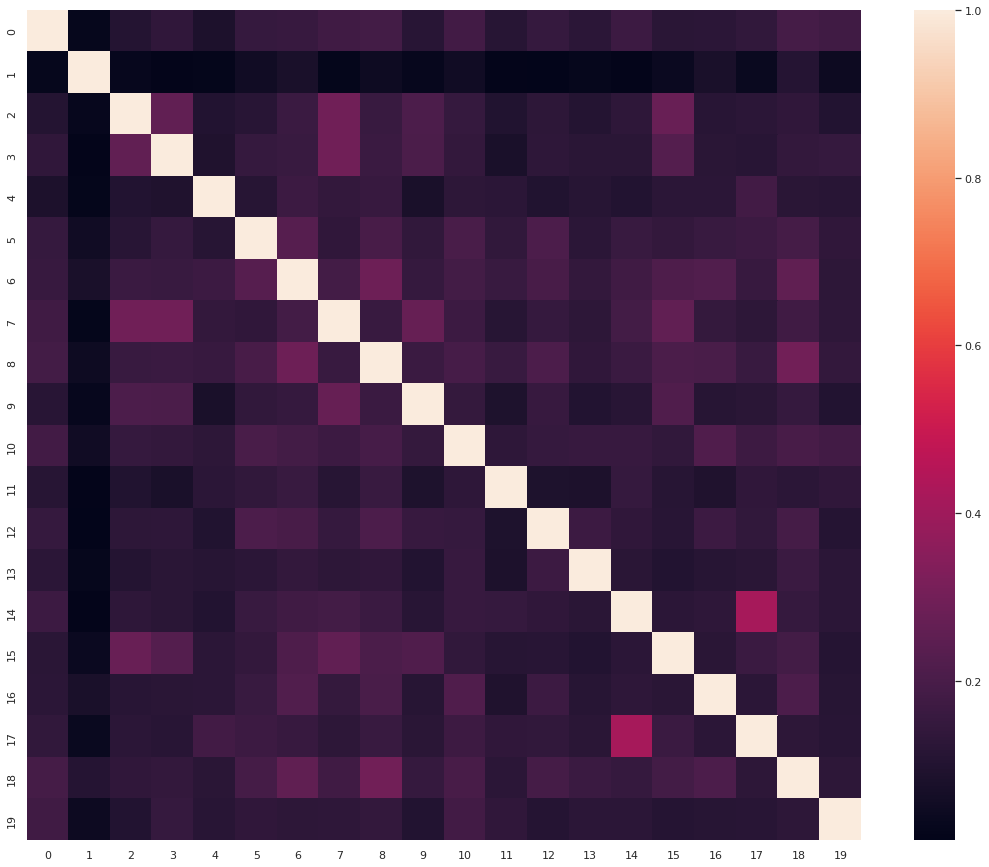

In [ ]:
tfidf_Abstrak_sim_matrix =  np.array(tfidf_Abstrak_sim)
tfidf_Abstrak_sim_matrix.shape

sns.set(rc={'figure.figsize':(18.7,15.27)})
sns.heatmap(tfidf_Abstrak_sim_matrix)

In [ ]:
anchors = []
model = ct.Corex(n_hidden=5, seed=69)
model = model.fit(
    tfidf_Abstrak,
    words=tf_feature_names
)
for i, topic_ngrams in enumerate(model.get_topics(n_words=20)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: pipeline, will, ci, they, dialogue, whether, naming, cd, actions, interactive, policy, pipelines
Topic #2: dl, asr, ml, architecture, systems, design, smells, crossasr, system, failed
Topic #3: codebert, models, commit, pre, trained, summarization, dataset, better, generalizability, while, summaries
Topic #4: test, cases, cryptography, web, smart, crypto, bugs
Topic #5: cpdp, coverage, ba, rest, projects


##ICSME 2020


In [ ]:
papers_2020 = papers[papers['Tahun']==2020].copy()

In [ ]:
#Removing symbols from Abstrak
papers_2020['Abstract_Cleaned'] = papers_2020.apply(lambda row: (re.sub("[^A-Za-z0-9' ]", ' ', row['Abstrak'])),axis=1)
# Tokenization

papers_2020['Abstract_Cleaned'] = papers_2020.apply(lambda row: (word_tokenize(row['Abstract_Cleaned'])), axis = 1)
# Removing Stopwords

stop_words = set(stopwords.words('english'))
papers_2020['Abstract_Cleaned'] = papers_2020.apply(lambda row: ([w for w in row['Abstract_Cleaned'] if w not in stop_words]),axis=1)
# Lemmatization

lmtzr = WordNetLemmatizer()
papers_2020['Abstract_Cleaned'] = papers_2020.apply(lambda row: ([lmtzr.lemmatize(w) for w in row['Abstract_Cleaned']]), axis=1)

papers_2020.head

<bound method NDFrame.head of     Nomor                                              Judul  Tahun  \
60     61  Practitioners’ insights on machine-learning so...   2020   
61     62  JCoffee: Using Compiler Feedback to Make Parti...   2020   
62     63  Source Code based On-demand Class Documentatio...   2020   
63     64  Refactoring Recommendations Based on the Optim...   2020   
64     65  Mobile App Energy Consumption: A Study of Know...   2020   
65     66  Reducing accidental clones using instant clone...   2020   
66     67  Exploring the Challenges of Cloud Migrations D...   2020   
67     68  Towards a new Test Case Prioritization Approac...   2020   
68     69  On the need for automatic knowledge management...   2020   
69     70  Robin: A Voice Controlled Virtual Teammate for...   2020   
70     71  Automatic Identification of Rollback Edit with...   2020   
71     72  Newcomer Candidate: Characterizing Contributio...   2020   
72     73  Exploring Bluetooth Communication Pr

In [ ]:
Abstrak = papers_2020['Abstrak'].values

count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(Abstrak)
tfidf_vectorizer = TfidfTransformer().fit(counts)
tfidf_Abstrak = tfidf_vectorizer.transform(counts)
tfidf_Abstrak.shape

(20, 819)

In [ ]:
#Testing affinity propogation on Abstrak tfidf(experimental)
X = tfidf_Abstrak
clustering = AffinityPropagation().fit(X)

abstract_affinity_clusters = list(clustering.labels_)
print(abstract_affinity_clusters)

print("Number of clusters found = ", len(set(abstract_affinity_clusters)))

[3, 3, 0, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 2, 2, 3, 3, 2, 2]
Number of clusters found =  4


In [ ]:
dictionary = corpora.Dictionary(papers_2021['Abstract_Cleaned'])
texts = papers_2021['Abstract_Cleaned']
corpus = [dictionary.doc2bow(text) for text in papers_2021['Abstract_Cleaned']]

# Building LDA Model

lda_model_2020 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Visualizing topics using pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_2020, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.080743  0.100686       1        1  32.080527
0      0.135357  0.036109       2        1  28.975548
3     -0.019608 -0.100439       3        1  21.390496
2     -0.035006 -0.036356       4        1  17.553429, topic_info=          Term       Freq      Total Category  logprob  loglift
191       test  33.000000  33.000000  Default  30.0000  30.0000
6           DL   7.000000   7.000000  Default  29.0000  29.0000
73       model  17.000000  17.000000  Default  28.0000  28.0000
211        ASR   7.000000   7.000000  Default  27.0000  27.0000
196        web   8.000000   8.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
47           e   2.013194   6.891984   Topic4  -5.3642   0.5093
406   approach   2.021796   9.659541   Topic4  -5.3599   0.1760
82       paper   2.026252  10.567139   Topic4  -5.3577   0.0884
107   software   2.018890  11.602392   Topic4  -5.3614  -0.0087
45   developer   2.018751  15.579928   Topic4  -5.3614  -0.3036

[238 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
201       3  0.493876             25
288       1  0.466035            API
288       2  0.233017            API
288       3  0.349526            API
819       2  0.562637           APIs
...     ...       ...            ...
441       4  0.514911         vector
620       1  0.809692  vulnerability
196       2  0.914758            web
197       2  0.926940        without
198       2  0.926942        written

[302 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

In [ ]:
nmf_model = NMF(n_components=4, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_Abstrak)
nmf_W = nmf_model.transform(tfidf_Abstrak)
nmf_H = nmf_model.components_
#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 15
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(nmf_H, nmf_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  the to of and code in software on is developers we that for their can
Bug or Not? Bug Report Classification Using N-Gram IDF
Understanding Stack Overflow Code Fragments
Supervised vs Unsupervised Models: A Holistic Look at Effort-Aware Just-in-Time Defect Prediction
TraceLab Components for Generating Extractive Summaries of User Stories

 Topic 1:
Top Words:  the approach based comment text non score gen2 achieved declutter competition doc detects combines 847
CityVR: Gameful Software Visualizations
Using Observed Behavior to Reformulate Queries during Text Retrieval-based Bug Localization
NLP2Code: Code Snippet Content Assist via Natural Language Tasks
Confusion Detection in Code Reviews

 Topic 2:
Top Words:  management in knowledge tools such the slack reduced discuss organizations run absence other collaboration significantly
Learning to Predict Severity of Software Vulnerability Using Only Vulnerability Description
On-demand Developer Documentation
Heterogen

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lda_model = LatentDirichletAllocation(n_components=4, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf_Abstrak)
lda_W = lda_model.transform(tfidf_Abstrak)
lda_H = lda_model.components_

#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 20
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(lda_H, lda_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  the of code to warn in users developer systems or can consumption characteristics terms management mobile 2nd survey forums accuracy
CCLearner: A Deep Learning-Based Clone Detection Approach
Towards Accurate Duplicate Bug Retrieval Using Deep Learning Techniques
Using Observed Behavior to Reformulate Queries during Text Retrieval-based Bug Localization
Learning to Predict Severity of Software Vulnerability Using Only Vulnerability Description

 Topic 1:
Top Words:  to the sa4se models and well cloud engineers contributions of bert challenges guidelines is six compiler collected adoption work their
TraceLab Components for Generating Extractive Summaries of User Stories
Confusion Detection in Code Reviews
A Tale of CI Build Failures: An Open Source and a Financial Organization Perspective
How do Developers Test Android Applications?

 Topic 2:
Top Words:  technical vulnerability gnn case better program known coordination in communicate considerable an rates communi

In [ ]:
tfidf_Abstrak_sim = []

for i in range(0,tfidf_Abstrak.shape[0]):
    sim_array = cosine_similarity(tfidf_Abstrak,tfidf_Abstrak[i])
    sim_array = sim_array.flatten()
    tfidf_Abstrak_sim.append(sim_array)
    
tfidf_Abstrak_sim[0]

array([1.        , 0.09920932, 0.04647491, 0.10978348, 0.12217511,
       0.08597777, 0.11162365, 0.10077244, 0.14464014, 0.13447624,
       0.13702082, 0.10338086, 0.12905682, 0.13922452, 0.11373101,
       0.12087483, 0.15998976, 0.15538024, 0.11778802, 0.10347382])

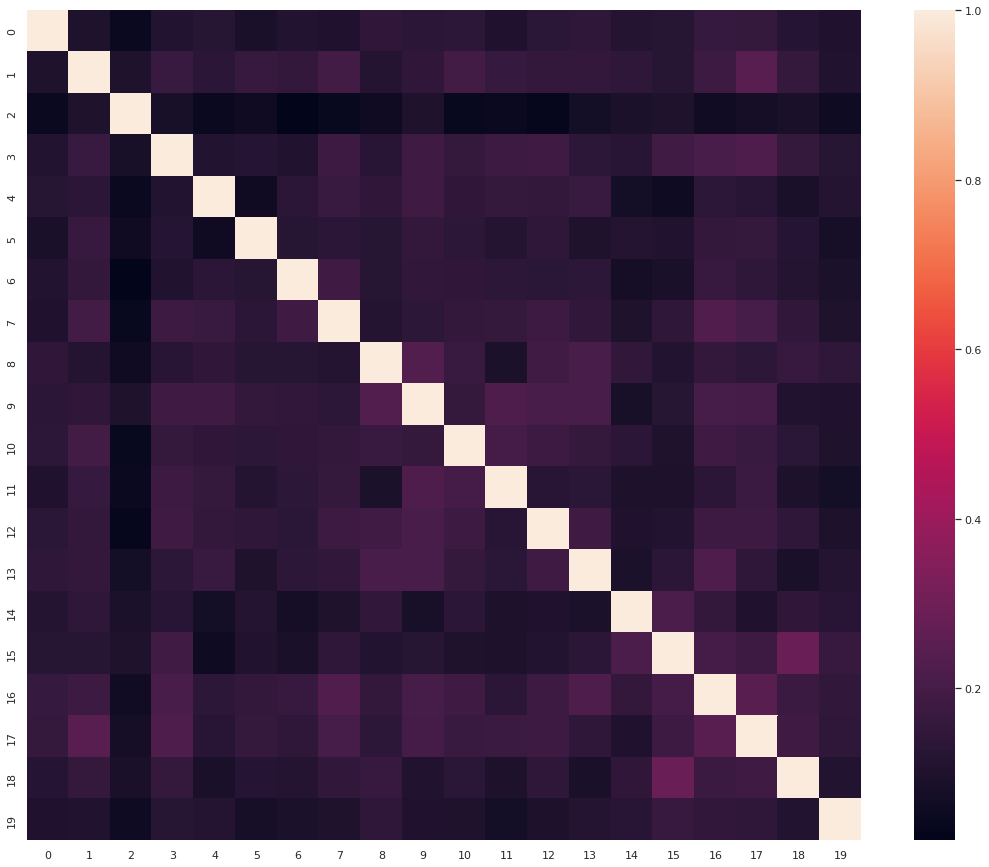

In [ ]:
tfidf_Abstrak_sim_matrix =  np.array(tfidf_Abstrak_sim)
tfidf_Abstrak_sim_matrix.shape

sns.set(rc={'figure.figsize':(18.7,15.27)})
sns.heatmap(tfidf_Abstrak_sim_matrix)

In [ ]:
anchors = []
model = ct.Corex(n_hidden=4, seed=69)
model = model.fit(
    tfidf_Abstrak,
    words=tf_feature_names
)
for i, topic_ngrams in enumerate(model.get_topics(n_words=20)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: ml, cloud, patterns, issues, challenges
Topic #2: test
Topic #3: class, documentation, technical
Topic #4: 


## ICSME 2019

In [ ]:
papers_2019 = papers[papers['Tahun']==2019].copy()

In [ ]:
#Removing symbols from Abstrak

papers_2019['Abstract_Cleaned'] = papers_2019.apply(lambda row: (re.sub("[^A-Za-z0-9' ]", ' ', row['Abstrak'])),axis=1)
# Tokenization

papers_2019['Abstract_Cleaned'] = papers_2019.apply(lambda row: (word_tokenize(row['Abstract_Cleaned'])), axis = 1)
# Removing Stopwords

stop_words = set(stopwords.words('english'))
papers_2019['Abstract_Cleaned'] = papers_2019.apply(lambda row: ([w for w in row['Abstract_Cleaned'] if w not in stop_words]),axis=1)
# Lemmatization

lmtzr = WordNetLemmatizer()
papers_2019['Abstract_Cleaned'] = papers_2019.apply(lambda row: ([lmtzr.lemmatize(w) for w in row['Abstract_Cleaned']]), axis=1)

papers_2019.head

<bound method NDFrame.head of     Nomor                                              Judul  Tahun  \
40     41  Message from the General Co-Chairs and the Pro...   2019   
41     42  A Longitudinal Analysis of Bug Handling Across...   2019   
42     43  Impact of Switching Bug Trackers: A Case Study...   2019   
43     44  The Impact of Rare Failures on Statistical Fau...   2019   
44     45  Do Energy-Oriented Changes Hinder Maintainabil...   2019   
45     46  Can Everyone use my app? An Empirical Study on...   2019   
46     47  Quantifying the Performance Impact of SQL Anti...   2019   
47     48  An Empirical Study of UI Implementations in An...   2019   
48     49  Same App, Different Countries: A Preliminary U...   2019   
49     50  Improving Bug Triaging with High Confidence Pr...   2019   
50     51  An Industrial Study on the Differences between...   2019   
51     52  Tracing with Less Data: Active Learning for Cl...   2019   
52     53  Deep Learning Anti-Patterns from Cod

In [ ]:
Abstrak = papers_2019['Abstrak'].values

count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(Abstrak)
tfidf_vectorizer = TfidfTransformer().fit(counts)
tfidf_Abstrak = tfidf_vectorizer.transform(counts)
tfidf_Abstrak.shape

(20, 1098)

In [ ]:
#Testing affinity propogation on Abstrak tfidf(experimental)
X = tfidf_Abstrak
clustering = AffinityPropagation().fit(X)

abstract_affinity_clusters = list(clustering.labels_)
print(abstract_affinity_clusters)

print("Number of clusters found = ", len(set(abstract_affinity_clusters)))

[0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 3, 3, 1, 1, 1, 3, 2, 1, 2]
Number of clusters found =  4


In [ ]:
dictionary = corpora.Dictionary(papers_2019['Abstract_Cleaned'])
texts = papers_2019['Abstract_Cleaned']
corpus = [dictionary.doc2bow(text) for text in papers_2019['Abstract_Cleaned']]

# Building LDA Model

lda_model_2019 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Visualizing topics using pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_2019, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.070288 -0.088225       1        1  29.443762
1      0.118844  0.023530       2        1  24.203034
3     -0.071442  0.111082       3        1  23.657541
0      0.022886 -0.046387       4        1  22.695662, topic_info=          Term       Freq      Total Category  logprob  loglift
36         bug  37.000000  37.000000  Default  30.0000  30.0000
267       code  23.000000  23.000000  Default  29.0000  29.0000
78     release  12.000000  12.000000  Default  28.0000  28.0000
275     energy   6.000000   6.000000  Default  27.0000  27.0000
428      level  10.000000  10.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
508   approach   2.848971  19.007461   Topic4  -5.2466  -0.4149
118  developer   2.221130  13.959142   Topic4  -5.4955  -0.3551
642     system   2.207633  11.221838   Topic4  -5.5016  -0.1429
54      impact   2.204207   5.493682   Topic4  -5.5032   0.5698
83      result   2.202984   9.765720   Topic4  -5.5037  -0.0061

[243 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
234       3  0.963815              2
762       4  0.729841              6
303       2  0.961000           APIs
868       3  0.963798            AST
915       1  0.960065           Bugs
...     ...       ...            ...
803       4  0.976493  vulnerability
491       1  0.622904           work
491       2  0.155726           work
491       3  0.155726           work
491       4  0.155726           work

[309 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

In [ ]:
nmf_model = NMF(n_components=4, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_Abstrak)
nmf_W = nmf_model.transform(tfidf_Abstrak)
nmf_H = nmf_model.components_
#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 15
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(nmf_H, nmf_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  the of to and in we that from is on software developers with this our
Flattening Code for Metrics Measurement and Analysis
Using Observed Behavior to Reformulate Queries during Text Retrieval-based Bug Localization
Supervised vs Unsupervised Models: A Holistic Look at Effort-Aware Just-in-Time Defect Prediction
CityVR: Gameful Software Visualizations

 Topic 1:
Top Words:  bug release releases fixing eclipse the triaging handling before process rate an after ericsson bugs
TraceLab Components for Generating Extractive Summaries of User Stories
On-demand Developer Documentation
Flattening Code for Metrics Measurement and Analysis
Towards Accurate Duplicate Bug Retrieval Using Deep Learning Techniques

 Topic 2:
Top Words:  bugs code context cloning clones fragment clone fragments release in former revision compared added pasting
Bug or Not? Bug Report Classification Using N-Gram IDF
Towards Accurate Duplicate Bug Retrieval Using Deep Learning Techniques
Understandi

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lda_model = LatentDirichletAllocation(n_components=4, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf_Abstrak)
lda_W = lda_model.transform(tfidf_Abstrak)
lda_H = lda_model.components_

#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 20
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(lda_H, lda_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  bug releases debt framework empirical fixing create semantic evaluated testing programming contributor implemented the presence process 37 three asts fragment
TraceLab Components for Generating Extractive Summaries of User Stories
Confusion Detection in Code Reviews
Artifacts for Dynamic Analysis of Android Apps
CCLearner: A Deep Learning-Based Clone Detection Approach

 Topic 1:
Top Words:  the other method mainly of reviews us advice classes nist siemens none with suites analyzing user decompose during assistive allows
Using Observed Behavior to Reformulate Queries during Text Retrieval-based Bug Localization
Learning to Predict Severity of Software Vulnerability Using Only Vulnerability Description
Artifacts for Dynamic Analysis of Android Apps
CCLearner: A Deep Learning-Based Clone Detection Approach

 Topic 2:
Top Words:  the of to in code bug that and bugs energy we tree logging developers conference sfl clone mobile analysis as
Heterogeneous Defect Predict

In [ ]:
tfidf_Abstrak_sim = []

for i in range(0,tfidf_Abstrak.shape[0]):
    sim_array = cosine_similarity(tfidf_Abstrak,tfidf_Abstrak[i])
    sim_array = sim_array.flatten()
    tfidf_Abstrak_sim.append(sim_array)
    
tfidf_Abstrak_sim[0]

array([1.        , 0.07557088, 0.13500259, 0.07805632, 0.04857277,
       0.07207863, 0.08253714, 0.06859912, 0.08651902, 0.09904291,
       0.09772058, 0.03830854, 0.06215344, 0.0503866 , 0.11040326,
       0.0784904 , 0.06767677, 0.04826022, 0.11716451, 0.11622155])

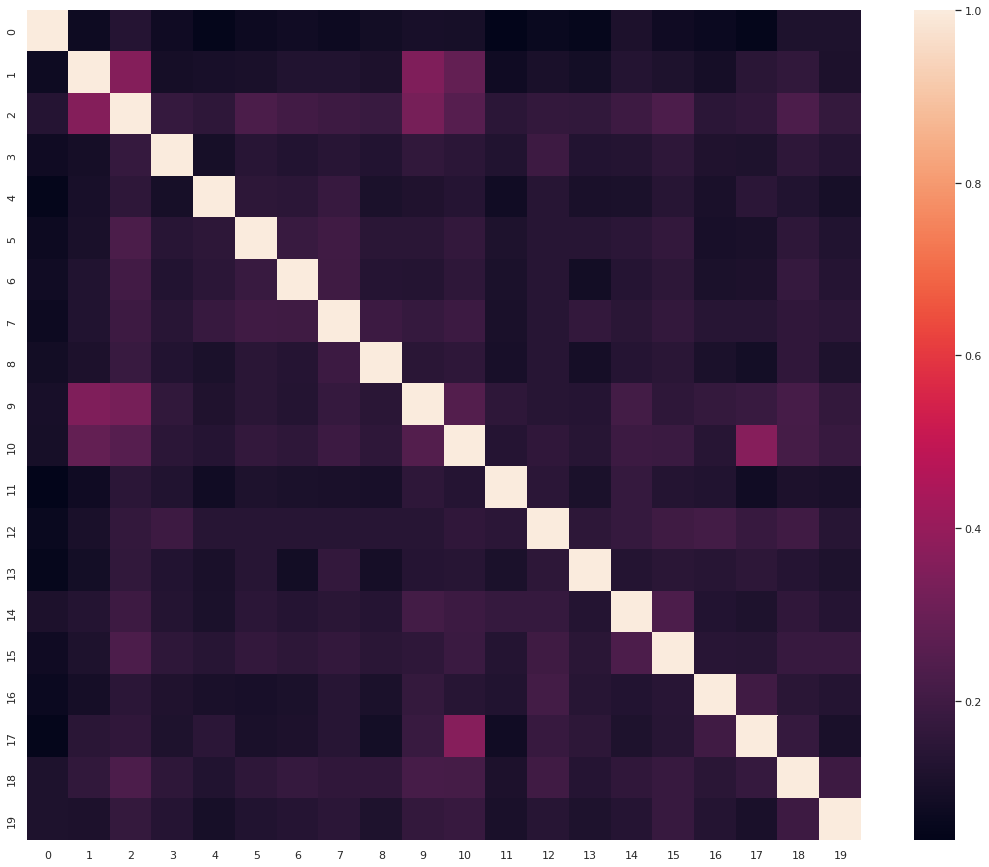

In [ ]:
tfidf_Abstrak_sim_matrix =  np.array(tfidf_Abstrak_sim)
tfidf_Abstrak_sim_matrix.shape

sns.set(rc={'figure.figsize':(18.7,15.27)})
sns.heatmap(tfidf_Abstrak_sim_matrix)

In [ ]:
anchors = []
model = ct.Corex(n_hidden=8, seed=69)
model = model.fit(
    tfidf_Abstrak,
    words=tf_feature_names
)
for i, topic_ngrams in enumerate(model.get_topics(n_words=20)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: debt, tree, business, framework, technical, node, conduct, embedding, phases, driven, prioritization, exploration, ast, vectors
Topic #2: reviews, logging, verbosity, countries, us, level, log, factors, levels
Topic #3: energy, conference, efficiency, proceedings, maintainability, introductory, welcome, record, message, congratulations, officers, may, publication, event
Topic #4: traceability, link, recovery, limitation, amount, supervised, maintaining, links
Topic #5: analyses, accessibility, mechanisms, uis, developers, ui
Topic #6: bug, release, bugs, ericsson, triaging, releases
Topic #7: 
Topic #8: security


## ICSME 2018

In [ ]:
papers_2018 = papers[papers['Tahun']==2018].copy()

In [ ]:
#Removing symbols from Abstrak

papers_2018['Abstract_Cleaned'] = papers_2018.apply(lambda row: (re.sub("[^A-Za-z0-9' ]", ' ', row['Abstrak'])),axis=1)
# Tokenization

papers_2018['Abstract_Cleaned'] = papers_2018.apply(lambda row: (word_tokenize(row['Abstract_Cleaned'])), axis = 1)
# Removing Stopwords

stop_words = set(stopwords.words('english'))
papers_2018['Abstract_Cleaned'] = papers_2018.apply(lambda row: ([w for w in row['Abstract_Cleaned'] if w not in stop_words]),axis=1)
# Lemmatization

lmtzr = WordNetLemmatizer()
papers_2018['Abstract_Cleaned'] = papers_2018.apply(lambda row: ([lmtzr.lemmatize(w) for w in row['Abstract_Cleaned']]), axis=1)

papers_2018.head

<bound method NDFrame.head of     Nomor                                              Judul  Tahun  \
20     21  NLP2API: Query Reformulation for Code Search U...   2018   
21     22  On the Relation of Test Smells to Software Cod...   2018   
22     23  Why are Features Deprecated? An Investigation ...   2018   
23     24  A Large-Scale Empirical Study on Linguistic An...   2018   
24     25  Beyond Metadata: Code-Centric and Usage-Based ...   2018   
25     26               Context-Aware Software Documentation   2018   
26     27  Why are Features Deprecated? An Investigation ...   2018   
27     28  On State Machine Mining from Embedded Control ...   2018   
28     29   Communicative Intention in Code Review Questions   2018   
29     30  Statistical Translation of English Texts to AP...   2018   
30     31  A Simple NLP-Based Approach to Support Onboard...   2018   
31     32  Clone-Based Variability Management in the Andr...   2018   
32     33  Automatic Traceability Maintenance v

In [ ]:
Abstrak = papers_2018['Abstrak'].values

count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(Abstrak)
tfidf_vectorizer = TfidfTransformer().fit(counts)
tfidf_Abstrak = tfidf_vectorizer.transform(counts)
tfidf_Abstrak.shape

(20, 1200)

In [ ]:
#Testing affinity propogation on Abstrak tfidf(experimental)
X = tfidf_Abstrak
clustering = AffinityPropagation().fit(X)

abstract_affinity_clusters = list(clustering.labels_)
print(abstract_affinity_clusters)

print("Number of clusters found = ", len(set(abstract_affinity_clusters)))

[3, 1, 0, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3]
Number of clusters found =  4


In [ ]:
dictionary = corpora.Dictionary(papers_2018['Abstract_Cleaned'])
texts = papers_2018['Abstract_Cleaned']
corpus = [dictionary.doc2bow(text) for text in papers_2018['Abstract_Cleaned']]

# Building LDA Model

lda_model_2018 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Visualizing topics using pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_2018, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.128835  0.000261       1        1  43.477743
2     -0.052750 -0.110861       2        1  30.753148
1     -0.065388  0.085910       3        1  19.039909
3     -0.010698  0.024690       4        1   6.729199, topic_info=           Term       Freq      Total Category  logprob  loglift
553     request  10.000000  10.000000  Default  30.0000  30.0000
730        pull   9.000000   9.000000  Default  29.0000  29.0000
1009  competing   4.000000   4.000000  Default  28.0000  28.0000
125         API  19.000000  19.000000  Default  27.0000  27.0000
336       state   9.000000   9.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
3            In   0.496826  13.076046   Topic4  -5.8880  -0.5716
37        paper   0.496497   9.311785   Topic4  -5.8887  -0.2327
246        open   0.494911   7.595211   Topic4  -5.8919  -0.0322
345        used   0.494759   7.478638   Topic4  -5.8922  -0.0170
281    analysis   0.493961   6.904523   Topic4  -5.8938   0.0612

[242 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
437       3  0.771793              '
172       1  0.657317              1
172       2  0.164329              1
172       3  0.164329              1
892       1  0.446452             10
...     ...       ...            ...
743       1  0.772630        variant
347       3  0.965391  vulnerability
348       3  0.772327     vulnerable
122       1  0.975899           well
1078      3  0.514330          yield

[255 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

In [ ]:
nmf_model = NMF(n_components=4, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_Abstrak)
nmf_W = nmf_model.transform(tfidf_Abstrak)
nmf_H = nmf_model.components_
#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 15
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(nmf_H, nmf_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  the of and to in code on database we by that for software is our
Continuous, Evolutionary and Large-Scale: A New Perspective for Automated Mobile App Testing
CCLearner: A Deep Learning-Based Clone Detection Approach
NLP2Code: Code Snippet Content Assist via Natural Language Tasks
Towards Accurate Duplicate Bug Retrieval Using Deep Learning Techniques

 Topic 1:
Top Words:  deprecation api producers reasons deprecate javadoc we behind rationale the data to that just mentioned
Flattening Code for Metrics Measurement and Analysis
How do Developers Test Android Applications?
On-demand Developer Documentation
Using Observed Behavior to Reformulate Queries during Text Retrieval-based Bug Localization

 Topic 2:
Top Words:  queries search nl engines overflow stack and using technique relevant frequently generic site reformulates mismatch
Artifacts for Dynamic Analysis of Android Apps
Confusion Detection in Code Reviews
Bug or Not? Bug Report Classification Using N-Gram 

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lda_model = LatentDirichletAllocation(n_components=4, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf_Abstrak)
lda_W = lda_model.transform(tfidf_Abstrak)
lda_H = lda_model.components_

#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 20
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(lda_H, lda_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  the of and to that we in api code search on database is project for source developers app from sources
Keynote abstracts
Continuous, Evolutionary and Large-Scale: A New Perspective for Automated Mobile App Testing
Heterogeneous Defect Prediction Through Multiple Kernel Learning and Ensemble Learning
CCLearner: A Deep Learning-Based Clone Detection Approach

 Topic 1:
Top Words:  pull competing hypotheses requests we gumtree industrial investigate icsme produced vocabulary pseudo developers 31 or test tracker information their needs
Bug or Not? Bug Report Classification Using N-Gram IDF
TraceLab Components for Generating Extractive Summaries of User Stories
NLP2Code: Code Snippet Content Assist via Natural Language Tasks
Artifacts for Dynamic Analysis of Android Apps

 Topic 2:
Top Words:  adding ast social toline all common other only background engineering like relationships either introduced study from file steeper tracker new
Bug or Not? Bug Report Classificat

In [ ]:
tfidf_Abstrak_sim = []

for i in range(0,tfidf_Abstrak.shape[0]):
    sim_array = cosine_similarity(tfidf_Abstrak,tfidf_Abstrak[i])
    sim_array = sim_array.flatten()
    tfidf_Abstrak_sim.append(sim_array)
    
tfidf_Abstrak_sim[0]

array([1.        , 0.07829159, 0.09637831, 0.1281187 , 0.10368848,
       0.16231766, 0.09637831, 0.09022081, 0.07790335, 0.09667562,
       0.12009894, 0.08401407, 0.11658746, 0.09446603, 0.08741336,
       0.09708531, 0.07379346, 0.06315961, 0.11420205, 0.46718696])

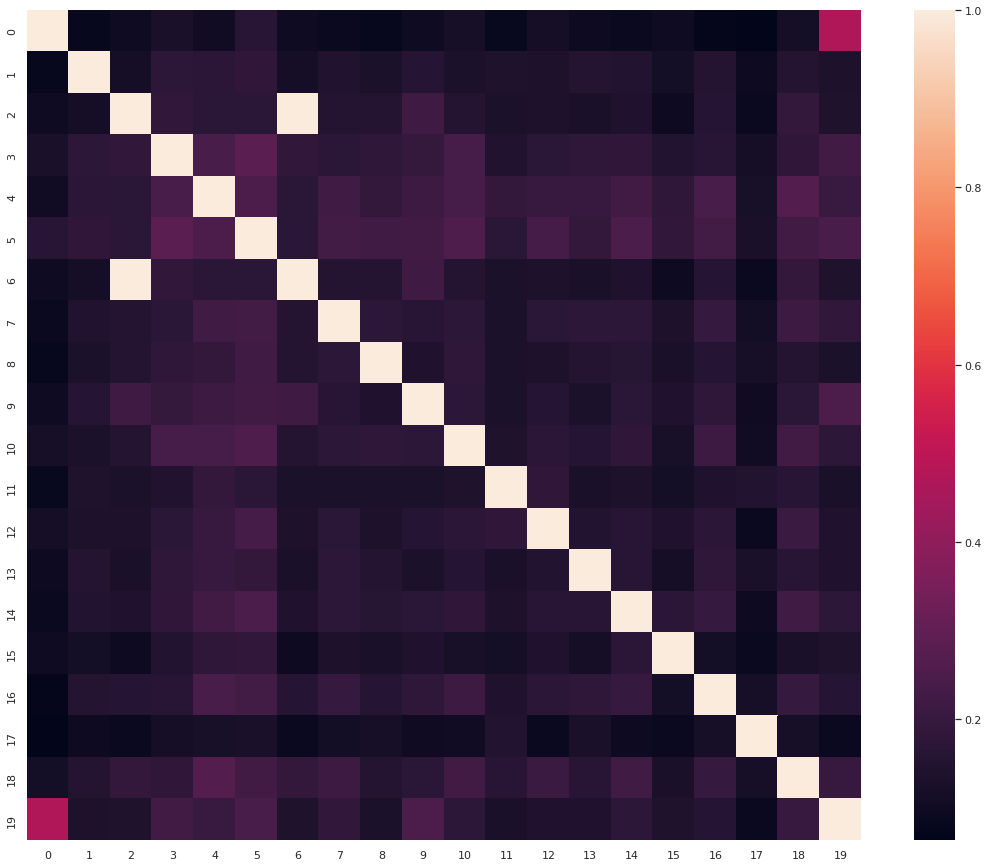

In [ ]:
tfidf_Abstrak_sim_matrix =  np.array(tfidf_Abstrak_sim)
tfidf_Abstrak_sim_matrix.shape

sns.set(rc={'figure.figsize':(18.7,15.27)})
sns.heatmap(tfidf_Abstrak_sim_matrix)

In [ ]:
anchors = []
model = ct.Corex(n_hidden=5, seed=69)
model = model.fit(
    tfidf_Abstrak,
    words=tf_feature_names
)
for i, topic_ngrams in enumerate(model.get_topics(n_words=20)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: deprecation, issues, apis, reasons, javadoc, deprecate, producers, newcomers, las, trigger, projects
Topic #2: pull, requests, app, competing, families, communicative, intentions, request, variants, apps
Topic #3: fixes, gistable, configuration, patterns, program, control, embedded, vulnerable
Topic #4: api, rationale, behind, elements, t2api
Topic #5: search, queries, database, engines, nl, technique


## ICSME 2017

In [ ]:
papers_2017 = papers[papers['Tahun']==2017].copy()

In [ ]:
#Removing symbols from Abstrak

papers_2017['Abstract_Cleaned'] = papers_2017.apply(lambda row: (re.sub("[^A-Za-z0-9' ]", ' ', row['Abstrak'])),axis=1)
# Tokenization

papers_2017['Abstract_Cleaned'] = papers_2017.apply(lambda row: (word_tokenize(row['Abstract_Cleaned'])), axis = 1)
# Removing Stopwords

stop_words = set(stopwords.words('english'))
papers_2017['Abstract_Cleaned'] = papers_2017.apply(lambda row: ([w for w in row['Abstract_Cleaned'] if w not in stop_words]),axis=1)
# Lemmatization

lmtzr = WordNetLemmatizer()
papers_2017['Abstract_Cleaned'] = papers_2017.apply(lambda row: ([lmtzr.lemmatize(w) for w in row['Abstract_Cleaned']]), axis=1)

papers_2017.head

<bound method NDFrame.head of     Nomor                                              Judul  Tahun  \
0       1     Artifacts for Dynamic Analysis of Android Apps   2017   
1       2  TraceLab Components for Generating Extractive ...   2017   
2       3  Flattening Code for Metrics Measurement and An...   2017   
3       4                                  Keynote abstracts   2017   
4       5  CCLearner: A Deep Learning-Based Clone Detecti...   2017   
5       6  Continuous, Evolutionary and Large-Scale: A Ne...   2017   
6       7       How do Developers Test Android Applications?   2017   
7       8  Supervised vs Unsupervised Models: A Holistic ...   2017   
8       9  Learning to Predict Severity of Software Vulne...   2017   
9      10                  On-demand Developer Documentation   2017   
10     11  Towards Accurate Duplicate Bug Retrieval Using...   2017   
11     12  A Tale of CI Build Failures: An Open Source an...   2017   
12     13  An Empirical Study on the Removal of

In [ ]:
Abstrak = papers_2017['Abstrak'].values

count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(Abstrak)
tfidf_vectorizer = TfidfTransformer().fit(counts)
tfidf_Abstrak = tfidf_vectorizer.transform(counts)
tfidf_Abstrak.shape

(20, 1064)

In [ ]:
#Testing affinity propogation on Abstrak tfidf(experimental)
X = tfidf_Abstrak
clustering = AffinityPropagation().fit(X)

abstract_affinity_clusters = list(clustering.labels_)
print(abstract_affinity_clusters)

print("Number of clusters found = ", len(set(abstract_affinity_clusters)))

[1, 2, 3, 0, 2, 1, 1, 2, 2, 1, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2]
Number of clusters found =  4


In [ ]:
dictionary = corpora.Dictionary(papers_2017['Abstract_Cleaned'])
texts = papers_2017['Abstract_Cleaned']
corpus = [dictionary.doc2bow(text) for text in papers_2017['Abstract_Cleaned']]

# Building LDA Model

lda_model_2017 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Visualizing topics using pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_2017, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.091404 -0.012005       1        1  34.130169
1      0.120897  0.043387       2        1  28.212876
2      0.019527 -0.114974       3        1  26.906010
3     -0.049020  0.083592       4        1  10.750945, topic_info=              Term       Freq      Total Category  logprob  loglift
507  vulnerability   9.000000   9.000000  Default  30.0000  30.0000
648           SATD  12.000000  12.000000  Default  29.0000  29.0000
929          query  10.000000  10.000000  Default  28.0000  28.0000
213       software  14.000000  14.000000  Default  27.0000  27.0000
78           clone  10.000000  10.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
300           term   0.628664   9.203209   Topic4  -5.9733  -0.4535
20           study   0.627068  11.461211   Topic4  -5.9759  -0.6755
108         report   0.627025   8.641250   Topic4  -5.9760  -0.3931
157          based   0.625877  10.008362   Topic4  -5.9778  -0.5418
100            one   0.625011   7.013881   Topic4  -5.9792  -0.1877

[233 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
361       1  0.199676              '
361       2  0.199676              '
361       3  0.599027              '
306       3  0.952142             's
946       3  0.896246              0
...     ...       ...            ...
826       4  0.600406  visualization
507       4  0.936095  vulnerability
508       1  0.412515           word
508       4  0.412515           word
828       4  0.855357          youtu

[283 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

In [ ]:
nmf_model = NMF(n_components=4, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_Abstrak)
nmf_W = nmf_model.transform(tfidf_Abstrak)
nmf_H = nmf_model.components_
#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 15
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(nmf_H, nmf_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  the to of and code in we that for bug satd is on software developers
Towards Accurate Duplicate Bug Retrieval Using Deep Learning Techniques
Confusion Detection in Code Reviews
Using Observed Behavior to Reformulate Queries during Text Retrieval-based Bug Localization
NLP2Code: Code Snippet Content Assist via Natural Language Tasks

 Topic 1:
Top Words:  testing mobile automated of comprehensive practices test current survey and app approaches researchers for tools
Continuous, Evolutionary and Large-Scale: A New Perspective for Automated Mobile App Testing
How do Developers Test Android Applications?
Confusion Detection in Code Reviews
Using Observed Behavior to Reformulate Queries during Text Retrieval-based Bug Localization

 Topic 2:
Top Words:  code program normalization flattening source elements simple technique or we results clone means variable untargeted
Flattening Code for Metrics Measurement and Analysis
Understanding Stack Overflow Code Fragments
CCLe

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lda_model = LatentDirichletAllocation(n_components=4, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf_Abstrak)
lda_W = lda_model.transform(tfidf_Abstrak)
lda_H = lda_model.components_

#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 20
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(lda_H, lda_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  satd failures oss recent removal characterized 349 detects reusable ci space forest tokens through their feature definition projects interaction indicate
A Tale of CI Build Failures: An Open Source and a Financial Organization Perspective
An Empirical Study on the Removal of Self-Admitted Technical Debt
Keynote abstracts
Artifacts for Dynamic Analysis of Android Apps

 Topic 1:
Top Words:  of the vulnerability and testing for to android practitioners in code that artifact provides one each performing mobile an presentations
Supervised vs Unsupervised Models: A Holistic Look at Effort-Aware Just-in-Time Defect Prediction
CityVR: Gameful Software Visualizations
Continuous, Evolutionary and Large-Scale: A New Perspective for Automated Mobile App Testing
How do Developers Test Android Applications?

 Topic 2:
Top Words:  the of to inline and clones for in code detection or fulfilled developers duplicate documentation bug are when evolving newly
Towards Accurate Dupli

In [ ]:
tfidf_Abstrak_sim = []

for i in range(0,tfidf_Abstrak.shape[0]):
    sim_array = cosine_similarity(tfidf_Abstrak,tfidf_Abstrak[i])
    sim_array = sim_array.flatten()
    tfidf_Abstrak_sim.append(sim_array)
    
tfidf_Abstrak_sim[0]

array([1.        , 0.05658821, 0.09759342, 0.06500228, 0.10481032,
       0.12454502, 0.14446769, 0.07154886, 0.04931723, 0.0647237 ,
       0.12018633, 0.06486506, 0.06400843, 0.04634173, 0.08300097,
       0.05676996, 0.10384503, 0.08168177, 0.07064247, 0.13024538])

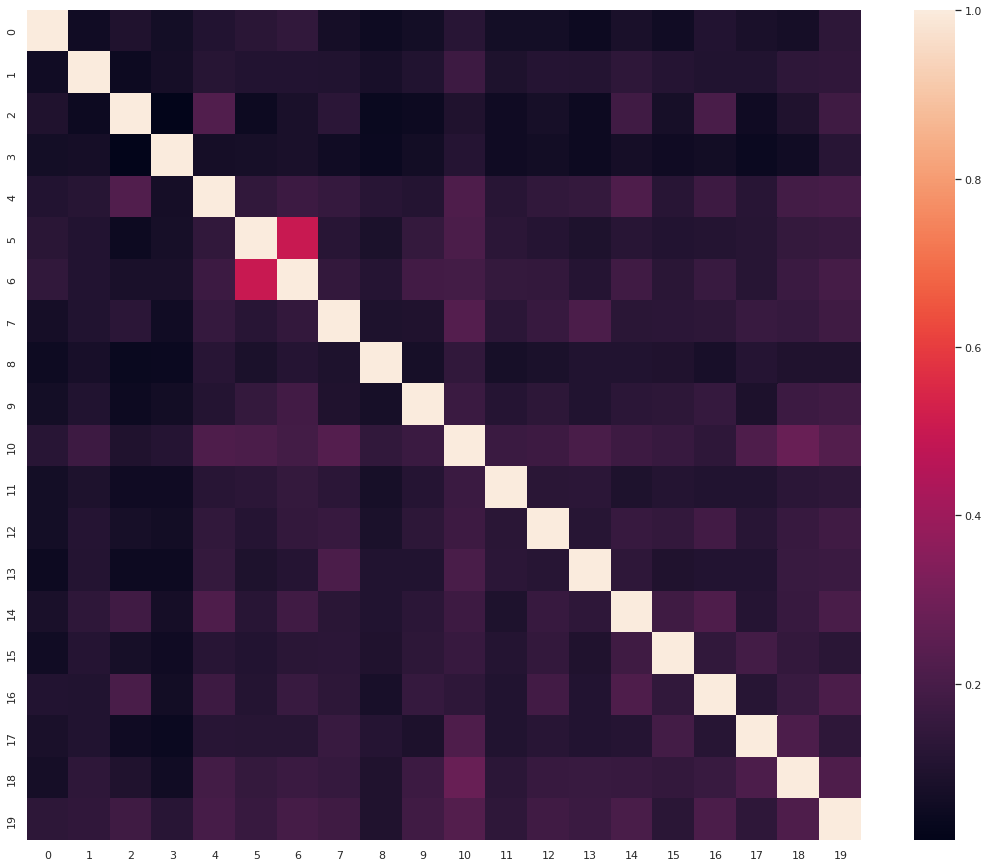

In [ ]:
tfidf_Abstrak_sim_matrix =  np.array(tfidf_Abstrak_sim)
tfidf_Abstrak_sim_matrix.shape

sns.set(rc={'figure.figsize':(18.7,15.27)})
sns.heatmap(tfidf_Abstrak_sim_matrix)

In [ ]:
anchors = []
model = ct.Corex(n_hidden=8, seed=69)
model = model.fit(
    tfidf_Abstrak,
    words=tf_feature_names
)
for i, topic_ngrams in enumerate(model.get_topics(n_words=20)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: dynamic, android, definition, suite, behavioral, inter, characterization, used, artifacts, apps, describe, performing, dataset
Topic #2: clones, program, failures, normalization, cclearner, ci, oss, flattening, clone, ing, processes, code
Topic #3: vulnerability, kernel, defect, prediction, defective, lt, vulnerabilities, hdp, description
Topic #4: satd, fragments, self, removed, explanatory, missing
Topic #5: tasks, idf, tool, engagement, gram, nlp2code, snippets
Topic #6: testing, mobile, artifact, automated, comprehensive, components
Topic #7: 
Topic #8: documentation


##Test

In [ ]:
df = papers.groupby(['Negara'])['Negara'].count().sort_values(ascending=False)
df

Negara
USA            27
Canada         12
China          10
Japan           6
Italy           5
Switzerland     5
Luxembourg      4
Brazil          4
France          4
Netherland      3
Australia       3
India           2
Austria         2
Germany         2
Singapore       2
Netherlands     1
New Zealand     1
Romania         1
Russia          1
SIngapore       1
Sweden          1
Colombia        1
Belgium         1
Uganda          1
Name: Negara, dtype: int64

##USA Trend

In [ ]:
papers_USA = papers[papers['Negara']=='USA'].copy()

In [ ]:
#Removing symbols from Abstrak

papers_USA['Abstract_Cleaned'] = papers_USA.apply(lambda row: (re.sub("[^A-Za-z0-9' ]", ' ', row['Abstrak'])),axis=1)
# Tokenization

papers_USA['Abstract_Cleaned'] = papers_USA.apply(lambda row: (word_tokenize(row['Abstract_Cleaned'])), axis = 1)
# Removing Stopwords

stop_words = set(stopwords.words('english'))
papers_USA['Abstract_Cleaned'] = papers_USA.apply(lambda row: ([w for w in row['Abstract_Cleaned'] if w not in stop_words]),axis=1)
# Lemmatization

lmtzr = WordNetLemmatizer()
papers_USA['Abstract_Cleaned'] = papers_USA.apply(lambda row: ([lmtzr.lemmatize(w) for w in row['Abstract_Cleaned']]), axis=1)

papers_USA.head

<bound method NDFrame.head of     Nomor                                              Judul  Tahun Negara  \
0       1     Artifacts for Dynamic Analysis of Android Apps   2017    USA   
1       2  TraceLab Components for Generating Extractive ...   2017    USA   
4       5  CCLearner: A Deep Learning-Based Clone Detecti...   2017    USA   
5       6  Continuous, Evolutionary and Large-Scale: A Ne...   2017    USA   
6       7       How do Developers Test Android Applications?   2017    USA   
18     19  Using Observed Behavior to Reformulate Queries...   2017    USA   
32     33  Automatic Traceability Maintenance via Machine...   2018    USA   
33     34  An Empirical Study of Multi-entity Changes in ...   2018    USA   
35     36  Gistable: Evaluating the Executability of Pyth...   2018    USA   
38     39  A Practical Approach to the Automatic Classifi...   2018    USA   
40     41  Message from the General Co-Chairs and the Pro...   2019    USA   
43     44  The Impact of Rare Fail

In [ ]:
Abstrak = papers_USA['Abstrak'].values

count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(Abstrak)
tfidf_vectorizer = TfidfTransformer().fit(counts)
tfidf_Abstrak = tfidf_vectorizer.transform(counts)
tfidf_Abstrak.shape

(27, 1245)

In [ ]:
#Testing affinity propogation on Abstrak tfidf(experimental)
X = tfidf_Abstrak
clustering = AffinityPropagation().fit(X)

abstract_affinity_clusters = list(clustering.labels_)
print(abstract_affinity_clusters)

print("Number of clusters found = ", len(set(abstract_affinity_clusters)))

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Number of clusters found =  1


In [ ]:
dictionary = corpora.Dictionary(papers_USA['Abstract_Cleaned'])
texts = papers_USA['Abstract_Cleaned']
corpus = [dictionary.doc2bow(text) for text in papers_USA['Abstract_Cleaned']]

# Building LDA Model

lda_model_USA = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Visualizing topics using pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_USA, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.067177  0.0       1        1  70.956754
1     -0.067177  0.0       2        1  29.043246, topic_info=          Term       Freq      Total Category  logprob  loglift
156    testing  14.000000  14.000000  Default  30.0000  30.0000
91         bug  10.000000  10.000000  Default  29.0000  29.0000
362      query   8.000000   8.000000  Default  28.0000  28.0000
183  automated   8.000000   8.000000  Default  27.0000  27.0000
116        fix   7.000000   7.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
20       study   3.245581  10.584169   Topic2  -5.5265   0.0543
224   practice   3.221080  10.592344   Topic2  -5.5341   0.0460
19      source   3.346789  18.328440   Topic2  -5.4958  -0.4641
1           We   3.231234  16.033582   Topic2  -5.5310  -0.3654
78          In   3.229843  16.811851   Topic2  -5.5314  -0.4133

[145 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1046      1  0.875499            API
75        1  0.935320      CCLEARNER
78        1  0.832746             In
78        2  0.178446             In
314       2  0.822623             OB
...     ...       ...            ...
61        1  0.783883           user
61        2  0.195971           user
631       1  0.999750  vulnerability
449       1  0.935112           work
449       2  0.133587           work

[154 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [ ]:
nmf_model = NMF(n_components=2, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_Abstrak)
nmf_W = nmf_model.transform(tfidf_Abstrak)
nmf_H = nmf_model.components_
#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 15
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(nmf_H, nmf_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  the and to of in that code software we from is traceability for on as
On-demand Developer Documentation
How do Developers Test Android Applications?
Context-Aware Software Documentation
Understanding Stack Overflow Code Fragments

 Topic 1:
Top Words:  testing automated mobile of comprehensive practices survey test app current for researchers developers cases solution
Keynote abstracts
CCLearner: A Deep Learning-Based Clone Detection Approach
Heterogeneous Defect Prediction Through Multiple Kernel Learning and Ensemble Learning
An Empirical Study on the Removal of Self-Admitted Technical Debt


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lda_model = LatentDirichletAllocation(n_components=2, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf_Abstrak)
lda_W = lda_model.transform(tfidf_Abstrak)
lda_H = lda_model.components_

#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 20
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(lda_H, lda_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  and to the of in we as that software queries is for systems environments from this components such tracelab reviews
Beyond Metadata: Code-Centric and Usage-Based Analysis of Known Vulnerabilities in Open-Source Software
A Large-Scale Empirical Study on Linguistic Antipatterns Affecting APIs
On the Relation of Test Smells to Software Code Quality
TraceLab Components for Generating Extractive Summaries of User Stories

 Topic 1:
Top Words:  the of and to that in code mobile testing automated on source clones with we practices for is app android
Keynote abstracts
On-demand Developer Documentation
Bug or Not? Bug Report Classification Using N-Gram IDF
Learning to Predict Severity of Software Vulnerability Using Only Vulnerability Description


In [ ]:
tfidf_Abstrak_sim = []

for i in range(0,tfidf_Abstrak.shape[0]):
    sim_array = cosine_similarity(tfidf_Abstrak,tfidf_Abstrak[i])
    sim_array = sim_array.flatten()
    tfidf_Abstrak_sim.append(sim_array)
    
tfidf_Abstrak_sim[0]

array([1.        , 0.05312567, 0.09688293, 0.11340506, 0.1526652 ,
       0.06539669, 0.10462257, 0.07943641, 0.06309033, 0.08789583,
       0.02610459, 0.12516415, 0.08943398, 0.15600711, 0.08768673,
       0.05856996, 0.08522142, 0.08539871, 0.08668142, 0.04508656,
       0.08194882, 0.06220239, 0.06733064, 0.06711418, 0.04969658,
       0.09879102, 0.03978219])

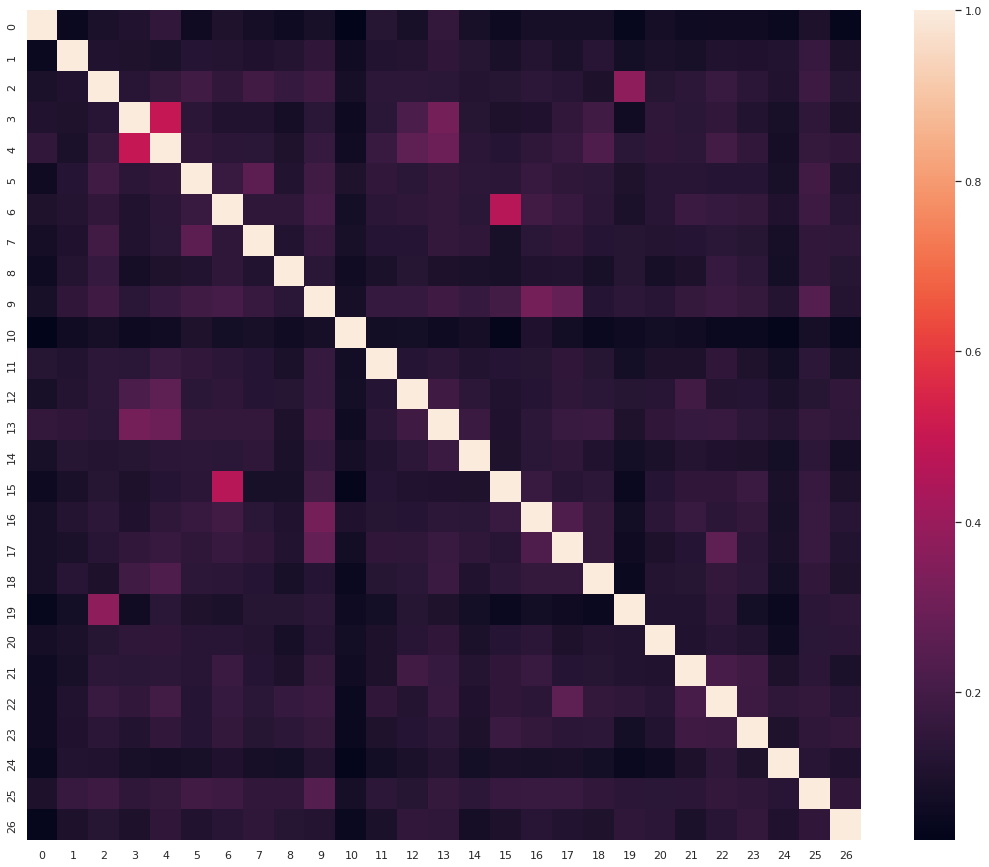

In [ ]:
tfidf_Abstrak_sim_matrix =  np.array(tfidf_Abstrak_sim)
tfidf_Abstrak_sim_matrix.shape

sns.set(rc={'figure.figsize':(18.7,15.27)})
sns.heatmap(tfidf_Abstrak_sim_matrix)

In [ ]:
anchors = []
model = ct.Corex(n_hidden=2, seed=69)
model = model.fit(
    tfidf_Abstrak,
    words=tf_feature_names
)
for i, topic_ngrams in enumerate(model.get_topics(n_words=20)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: traceability, developer, app, change
Topic #2: reviews, artifact, android


##Canada Trend

In [ ]:
papers_Canada = papers[papers['Negara']=='Canada'].copy()

In [ ]:
#Removing symbols from Abstrak

papers_Canada['Abstract_Cleaned'] = papers_Canada.apply(lambda row: (re.sub("[^A-Za-z0-9']", ' ', row['Abstrak'])),axis=1)
# Tokenization

papers_Canada['Abstract_Cleaned'] = papers_Canada.apply(lambda row: (word_tokenize(row['Abstract_Cleaned'])), axis = 1)
# Removing Stopwords

stop_words = set(stopwords.words('english'))
papers_Canada['Abstract_Cleaned'] = papers_Canada.apply(lambda row: ([w for w in row['Abstract_Cleaned'] if w not in stop_words]),axis=1)
# Lemmatization

lmtzr = WordNetLemmatizer()
papers_Canada['Abstract_Cleaned'] = papers_Canada.apply(lambda row: ([lmtzr.lemmatize(w) for w in row['Abstract_Cleaned']]), axis=1)

papers_Canada.head

<bound method NDFrame.head of     Nomor                                              Judul  Tahun  Negara  \
7       8  Supervised vs Unsupervised Models: A Holistic ...   2017  Canada   
9      10                  On-demand Developer Documentation   2017  Canada   
12     13  An Empirical Study on the Removal of Self-Admi...   2017  Canada   
20     21  NLP2API: Query Reformulation for Code Search U...   2018  Canada   
29     30  Statistical Translation of English Texts to AP...   2018  Canada   
39     40  Effective Reformulation of Query for Code Sear...   2018  Canada   
49     50  Improving Bug Triaging with High Confidence Pr...   2019  Canada   
52     53  Deep Learning Anti-Patterns from Code Metrics ...   2019  Canada   
57     58  Investigating Context Adaptation Bugs in Code ...   2019  Canada   
70     71  Automatic Identification of Rollback Edit with...   2020  Canada   
72     73  Exploring Bluetooth Communication Protocols in...   2020  Canada   
80     81  Design Smel

In [ ]:
Abstrak = papers_Canada['Abstrak'].values

count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(Abstrak)
tfidf_vectorizer = TfidfTransformer().fit(counts)
tfidf_Abstrak = tfidf_vectorizer.transform(counts)
tfidf_Abstrak.shape

(12, 797)

In [ ]:
#Testing affinity propogation on Abstrak tfidf(experimental)
X = tfidf_Abstrak
clustering = AffinityPropagation().fit(X)

abstract_affinity_clusters = list(clustering.labels_)
print(abstract_affinity_clusters)

print("Number of clusters found = ", len(set(abstract_affinity_clusters)))

[1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2]
Number of clusters found =  3


In [ ]:
dictionary = corpora.Dictionary(papers_Canada['Abstract_Cleaned'])
texts = papers_Canada['Abstract_Cleaned']
corpus = [dictionary.doc2bow(text) for text in papers_Canada['Abstract_Cleaned']]

# Building LDA Model

lda_model_Canada = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Visualizing topics using pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_Canada, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.123219  0.019056       1        1  49.879720
1      0.041671 -0.097849       2        1  27.746165
0      0.081548  0.078793       3        1  22.374114, topic_info=          Term       Freq      Total Category  logprob  loglift
675         DL   7.000000   7.000000  Default  30.0000  30.0000
54   developer  15.000000  15.000000  Default  29.0000  29.0000
193       SATD  12.000000  12.000000  Default  28.0000  28.0000
489     design   6.000000   6.000000  Default  27.0000  27.0000
41      change   5.000000   5.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
87       model   1.375175   7.988932   Topic3  -5.5531  -0.2622
157   existing   1.373897   4.531851   Topic3  -5.5541   0.3038
170       need   1.372694   4.012601   Topic3  -5.5549   0.4246
325      based   1.370132   4.011145   Topic3  -5.5568   0.4231
99     perform   1.370031   3.889736   Topic3  -5.5569   0.4538

[167 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
313       1  0.988694           API
621       3  0.823788          BCPs
622       3  0.543360     Bluetooth
531       1  0.926733          Bugs
469       2  0.771505          CAME
...     ...       ...           ...
135       2  0.512952  unsupervised
379       1  0.805616         usage
618       2  0.885232          user
305       1  0.780221         using
305       2  0.195055         using

[179 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [ ]:
nmf_model = NMF(n_components=3, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_Abstrak)
nmf_W = nmf_model.transform(tfidf_Abstrak)
nmf_H = nmf_model.components_
#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 15
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(nmf_H, nmf_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  the of and to we in satd that dl api on bug design is information
How do Developers Test Android Applications?
A Tale of CI Build Failures: An Open Source and a Financial Organization Perspective
On-demand Developer Documentation
Flattening Code for Metrics Measurement and Analysis

 Topic 1:
Top Words:  search queries and nl stack overflow using engines code relevant technique natural classes language such
Keynote abstracts
Continuous, Evolutionary and Large-Scale: A New Perspective for Automated Mobile App Testing
CCLearner: A Deep Learning-Based Clone Detection Approach
A Tale of CI Build Failures: An Open Source and a Financial Organization Perspective

 Topic 2:
Top Words:  bugs code clones cloning context fragment fragments clone in can pasting tendency copy introduce added
Learning to Predict Severity of Software Vulnerability Using Only Vulnerability Description
A Tale of CI Build Failures: An Open Source and a Financial Organization Perspective
Towards A

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lda_model = LatentDirichletAllocation(n_components=3, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf_Abstrak)
lda_W = lda_model.transform(tfidf_Abstrak)
lda_H = lda_model.components_

#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 20
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(lda_H, lda_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  of to discrepancies anti came systems experiment the empirical patterns so infer metrics their users using conceptual online just written
Supervised vs Unsupervised Models: A Holistic Look at Effort-Aware Just-in-Time Defect Prediction
Towards Accurate Duplicate Bug Retrieval Using Deep Learning Techniques
On-demand Developer Documentation
TraceLab Components for Generating Extractive Summaries of User Stories

 Topic 1:
Top Words:  the api of search code and queries dl bugs in context to engines documentation t2api implementation lead smells relevant language
Continuous, Evolutionary and Large-Scale: A New Perspective for Automated Mobile App Testing
A Tale of CI Build Failures: An Open Source and a Financial Organization Perspective
Learning to Predict Severity of Software Vulnerability Using Only Vulnerability Description
CCLearner: A Deep Learning-Based Clone Detection Approach

 Topic 2:
Top Words:  satd and to the clone models came days been findings bug si

In [ ]:
tfidf_Abstrak_sim = []

for i in range(0,tfidf_Abstrak.shape[0]):
    sim_array = cosine_similarity(tfidf_Abstrak,tfidf_Abstrak[i])
    sim_array = sim_array.flatten()
    tfidf_Abstrak_sim.append(sim_array)
    
tfidf_Abstrak_sim[0]

array([1.        , 0.11225237, 0.17544026, 0.11846472, 0.15803589,
       0.16809805, 0.23279676, 0.17173288, 0.16135949, 0.14988143,
       0.13781875, 0.18193629])

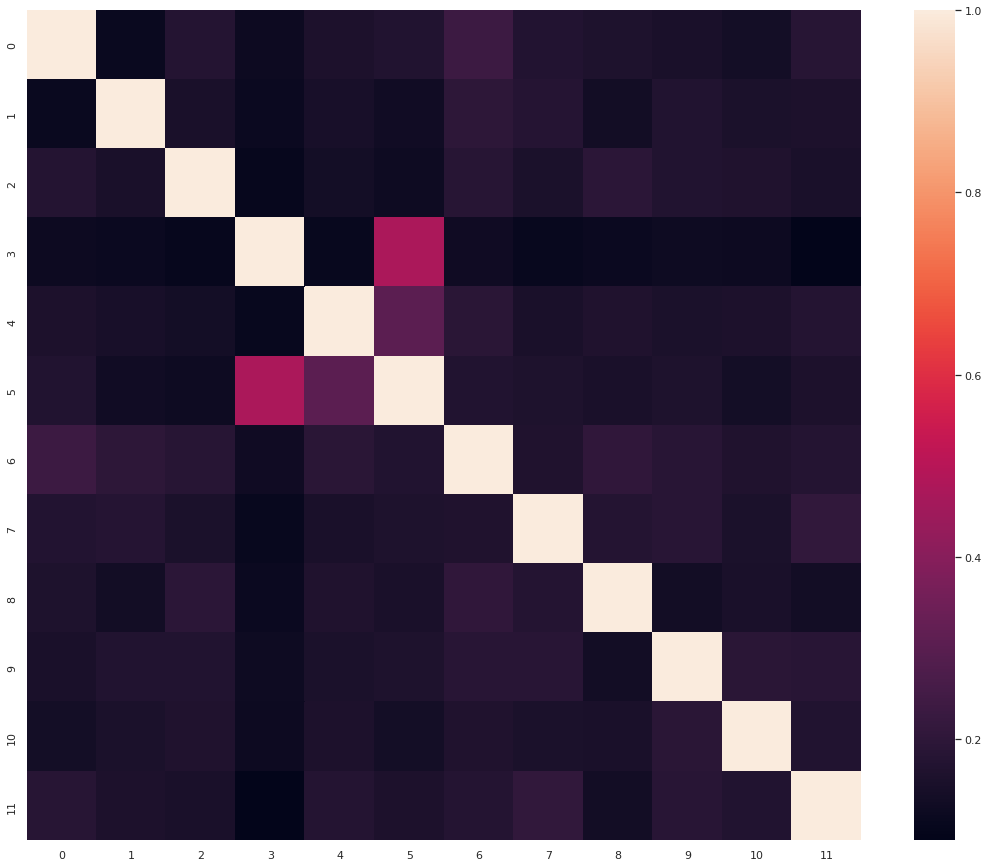

In [ ]:
tfidf_Abstrak_sim_matrix =  np.array(tfidf_Abstrak_sim)
tfidf_Abstrak_sim_matrix.shape

sns.set(rc={'figure.figsize':(18.7,15.27)})
sns.heatmap(tfidf_Abstrak_sim_matrix)

In [ ]:
anchors = []
model = ct.Corex(n_hidden=3, seed=69)
model = model.fit(
    tfidf_Abstrak,
    words=tf_feature_names
)
for i, topic_ngrams in enumerate(model.get_topics(n_words=20)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: api, search, queries
Topic #2: bugs, dl
Topic #3: satd


## China Trend

In [ ]:
papers_China = papers[papers['Negara']=='China'].copy()

In [ ]:
#Removing symbols from Abstrak

papers_China['Abstract_Cleaned'] = papers_China.apply(lambda row: (re.sub("[^A-Za-z0-9']", ' ', row['Abstrak'])),axis=1)
# Tokenization

papers_China['Abstract_Cleaned'] = papers_China.apply(lambda row: (word_tokenize(row['Abstract_Cleaned'])), axis = 1)
# Removing Stopwords

stop_words = set(stopwords.words('english'))
papers_China['Abstract_Cleaned'] = papers_China.apply(lambda row: ([w for w in row['Abstract_Cleaned'] if w not in stop_words]),axis=1)
# Lemmatization

lmtzr = WordNetLemmatizer()
papers_China['Abstract_Cleaned'] = papers_China.apply(lambda row: ([lmtzr.lemmatize(w) for w in row['Abstract_Cleaned']]), axis=1)

papers_China.head

<bound method NDFrame.head of     Nomor                                              Judul  Tahun Negara  \
3       4                                  Keynote abstracts   2017  China   
8       9  Learning to Predict Severity of Software Vulne...   2017  China   
13     14  Heterogeneous Defect Prediction Through Multip...   2017  China   
37     38  How do Multiple Pull Requests Change the Same ...   2018  China   
53     54  An Approach to Recommendation of Verbosity Log...   2019  China   
56     57  TECCD: A Tree Embedding Approach for Code Clon...   2019  China   
62     63  Source Code based On-demand Class Documentatio...   2020  China   
74     75  Graph Neural Network-based Vulnerability Predi...   2020  China   
75     76  Learning based and Context Aware Non-Informati...   2020  China   
87     88  The Unit Test Quality of Deep Learning Librari...   2021  China   

                                              Abstrak  \
3   Provides an abstract for each of the keynote p... 

In [ ]:
Abstrak = papers_China['Abstrak'].values

count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(Abstrak)
tfidf_vectorizer = TfidfTransformer().fit(counts)
tfidf_Abstrak = tfidf_vectorizer.transform(counts)
tfidf_Abstrak.shape

(10, 587)

In [ ]:
#Testing affinity propogation on Abstrak tfidf(experimental)
X = tfidf_Abstrak
clustering = AffinityPropagation().fit(X)

abstract_affinity_clusters = list(clustering.labels_)
print(abstract_affinity_clusters)

print("Number of clusters found = ", len(set(abstract_affinity_clusters)))

[0, 4, 4, 1, 2, 2, 3, 4, 4, 2]
Number of clusters found =  5


In [ ]:
dictionary = corpora.Dictionary(papers_China['Abstract_Cleaned'])
texts = papers_China['Abstract_Cleaned']
corpus = [dictionary.doc2bow(text) for text in papers_China['Abstract_Cleaned']]

# Building LDA Model

lda_model_China = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Visualizing topics using pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_China, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.033638 -0.154383       1        1  45.344815
3     -0.116201  0.058704       2        1  24.084869
4      0.170830  0.020606       3        1  17.292681
0     -0.023882  0.078767       4        1  13.256403
1      0.002891 -0.003693       5        1   0.021231, topic_info=              Term       Freq      Total Category  logprob  loglift
244           pull  13.000000  13.000000  Default  30.0000  30.0000
249        request  13.000000  13.000000  Default  29.0000  29.0000
93   vulnerability  16.000000  16.000000  Default  28.0000  28.0000
126      competing   6.000000   6.000000  Default  27.0000  27.0000
37            data   6.000000   6.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
205           code   0.000444  10.815371   Topic5  -6.2538  -1.6436
29        approach   0.000444  14.442306   Topic5  -6.2540  -1.9330
41     description   0.000444   5.504491   Topic5  -6.2543  -0.9687
213      developer   0.000441   5.761630   Topic5  -6.2605  -1.0205
172         source   0.000440   3.236103   Topic5  -6.2616  -0.4448

[280 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
96        1  0.512681              1
96        4  0.512681              1
178       3  0.547314             10
97        4  0.888231              2
98        1  0.512645             30
...     ...       ...            ...
364       1  0.909903      verbosity
93        2  0.992312  vulnerability
94        2  1.017500           word
95        1  0.358417           work
95        2  0.716834           work

[258 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 1, 2])

In [ ]:
nmf_model = NMF(n_components=5, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_Abstrak)
nmf_W = nmf_model.transform(tfidf_Abstrak)
nmf_H = nmf_model.components_
#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 15
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(nmf_H, nmf_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  the to approach and code based of in we our tree kernel logging prediction on
Learning to Predict Severity of Software Vulnerability Using Only Vulnerability Description
Continuous, Evolutionary and Large-Scale: A New Perspective for Automated Mobile App Testing
Flattening Code for Metrics Measurement and Analysis
On-demand Developer Documentation

 Topic 1:
Top Words:  documentation class openapidocgen2 usage concepts generates methods and includes given directives key domain relevant functionality
How do Developers Test Android Applications?
On-demand Developer Documentation
Learning to Predict Severity of Software Vulnerability Using Only Vulnerability Description
Supervised vs Unsupervised Models: A Holistic Look at Effort-Aware Just-in-Time Defect Prediction

 Topic 2:
Top Words:  each brief include presentations keynote abstract biography professional may provides of an for the and
Artifacts for Dynamic Analysis of Android Apps
On-demand Developer Documenta

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lda_model = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf_Abstrak)
lda_W = lda_model.transform(tfidf_Abstrak)
lda_H = lda_model.components_

#Not sure how to find lda_W & lda_H using gensim lda model
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])

no_top_words = 20
no_top_documents = 4     
title_list = papers['Judul'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(lda_H, lda_W, tf_feature_names, title_list, no_top_words, no_top_documents)


 Topic 0:
Top Words:  inappropriate previously heterogeneous outperforms term different about configurations runtime combines sentence detect submit density cause 11 become branches 10 inseparable
Artifacts for Dynamic Analysis of Android Apps
How do Developers Test Android Applications?
Learning to Predict Severity of Software Vulnerability Using Only Vulnerability Description
Supervised vs Unsupervised Models: A Holistic Look at Effort-Aware Just-in-Time Defect Prediction

 Topic 1:
Top Words:  the to of and vulnerability for test in each based on data brief we include class code approach our examples
CCLearner: A Deep Learning-Based Clone Detection Approach
Continuous, Evolutionary and Large-Scale: A New Perspective for Automated Mobile App Testing
On-demand Developer Documentation
Flattening Code for Metrics Measurement and Analysis

 Topic 2:
Top Words:  verbosity train the verbosityleveldirector appropriate still inseparable integrate top software specific critical impact divers

In [ ]:
tfidf_Abstrak_sim = []

for i in range(0,tfidf_Abstrak.shape[0]):
    sim_array = cosine_similarity(tfidf_Abstrak,tfidf_Abstrak[i])
    sim_array = sim_array.flatten()
    tfidf_Abstrak_sim.append(sim_array)
    
tfidf_Abstrak_sim[0]

array([1.        , 0.07231189, 0.07561529, 0.08909469, 0.05044823,
       0.09043471, 0.03100644, 0.07772387, 0.08041834, 0.06696394])

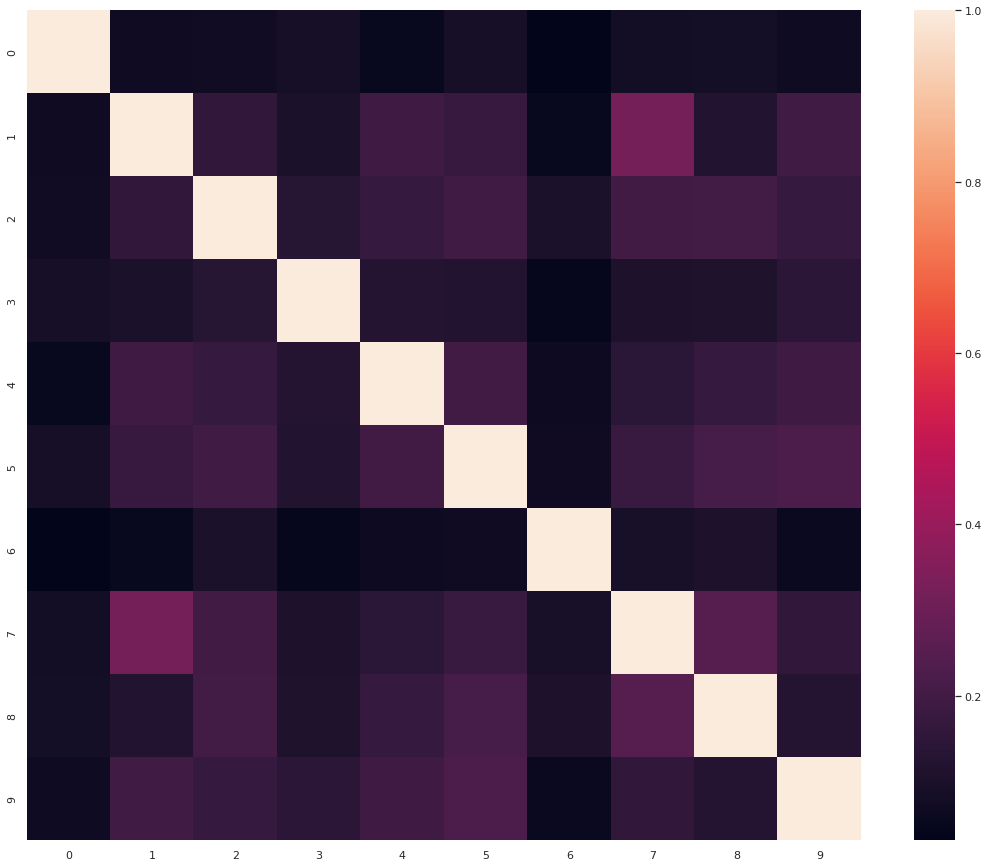

In [ ]:
tfidf_Abstrak_sim_matrix =  np.array(tfidf_Abstrak_sim)
tfidf_Abstrak_sim_matrix.shape

sns.set(rc={'figure.figsize':(18.7,15.27)})
sns.heatmap(tfidf_Abstrak_sim_matrix)

In [ ]:
anchors = []
model = ct.Corex(n_hidden=5, seed=69)
model = model.fit(
    tfidf_Abstrak,
    words=tf_feature_names
)
for i, topic_ngrams in enumerate(model.get_topics(n_words=20)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: logging, verbosity, level, log, levels
Topic #2: pull, requests, kernel, competing, data, defect
Topic #3: vulnerability, gnn, test, cases, vulnerabilities, bugs
Topic #4: tree, clone, embedding
Topic #5: 
